Read in the data and import the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from data_personal_example import transaction_data_file, large_pre_gas_prices_file, \
suite_spot_txn, post_eip_large_blocks

pre_eip=pd.read_csv(large_pre_gas_prices_file)
post_eip_blx=pd.read_csv(post_eip_large_blocks)

First we will try to ascertain the distribution of the pre-EIP data.

,hash,block_number,block_timestamp,receipt_gas_used,gas_price
0,0xc9d37faf9270c0aa1a553d4e53777cf1617a606d8a26...,12111333,2021-03-26 00:16:51 UTC,45764,129000000000
1,0xceeee703a7638bfa1eaa0c3d97f31fe211dfb77915e6...,12111413,2021-03-26 00:33:17 UTC,36601,168000000000
2,0x87007e41f34e2c1ea51fe9ff5bde4a039c70f2a218fe...,12111458,2021-03-26 00:42:19 UTC,21000,174000000000
3,0x497a2de3a8a8a2799ead2bb558ba072cbb50c1f2ab8a...,12111280,2021-03-26 00:06:07 UTC,154315,168211840178
4,0x548aa6b360f2b81f0ed437b35af5405dfce857069e71...,12111328,2021-03-26 00:15:32 UTC,21000,154000000000
...,...,...,...,...,...
6264787,0xac03a458748d87b1e03732c7a60f13d3f6278e2dfb84...,12088722,2021-03-22 12:53:38 UTC,21000,165000000000
6264788,0xa10fa129bc83a7d7b85391b7c85ae579b3ab59ef6fd0...,12088822,2021-03-22 13:15:19 UTC,21000,213000000000
6264789,0xa43bb8f1b1d77b3f9770311998bc667e4e393e022021...,12085526,2021-03-22 00:58:55 UTC,112866,181000000000
6264790,0x5a90c80b066cd7577c71ee1e891353535d6e5f16f75c...,12087380,2021-03-22 07:54:46 UTC,21000,6000000000


165103890667.35025 1.4189931621311085e+21
165103890737.89563 165153230733.554


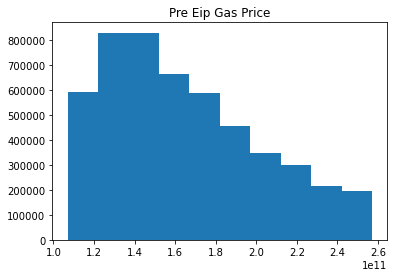

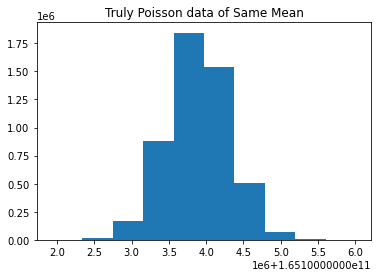

In [2]:
display(pre_eip)




pre_gas_price=list(pre_eip.gas_price)

my_up=np.percentile(pre_gas_price,90)
my_lo=np.percentile(pre_gas_price,10)

pre_gas_price=[x for x in pre_gas_price if (x < my_up) & (x > my_lo)]


fig = plt.figure()
ax = plt.axes()


my_mean=np.mean(pre_gas_price)
my_var=np.var(pre_gas_price)



plt.hist(pre_gas_price)
ax.set_title('Pre Eip Gas Price')
print(my_mean,my_var)



#observations
#variance-1.4189931621311085e+21
#mean-165103890667.35025



my_p_data=np.random.poisson(my_mean,len(pre_gas_price))

fig2 = plt.figure()
ax2 = plt.axes()

plt.hist(my_p_data)
ax2.set_title('Truly Poisson data of Same Mean')
print(np.mean(my_p_data),np.var(my_p_data))



Clearly the data is opperating substantially differently than a poisson r.v of the same mean. Furthermore, in the data, the mean and variance are substantially different, which should not be the case for truly poisson distributed data. Fuyrthermore, poisson data has the property of being able to be approximated by the binomial distribution for large values of n; therefore, like the binomial distribution, it will converge into the shape of a bell. curve for large values of n, clearly not meeting the requirments of our data

This next section is to determine where the spikes occur in the base fee of our dataset. plotting the data we can see that... 

,number,size,gas_limit,gas_used,timestamp,base_fee_per_gas
0,12965400,52195,27767214,8026699,1628172530,100260964379
1,12965401,133741,27740099,24776018,1628172535,94973980561
2,12965402,4899,27713011,1376999,1628172548,104308692426
3,12965403,91889,27740073,22128780,1628172552,92565823707
4,12965404,158870,27712985,27706025,1628172557,99455472742
...,...,...,...,...,...,...
249896,13215396,87214,30058591,22161127,1631509216,56944495762
249897,13215397,49453,30029238,9520510,1631509221,60322220541
249898,13215398,144226,30000000,29989644,1631509229,57563102455
249899,13215399,534,30000000,0,1631509265,64753522566


,number,size,gas_limit,gas_used,timestamp,base_fee_per_gas
0,12965400,52195,27767214,8026699,1628172530,100260964379
1,12965401,133741,27740099,24776018,1628172535,94973980561
2,12965402,4899,27713011,1376999,1628172548,104308692426
3,12965403,91889,27740073,22128780,1628172552,92565823707
4,12965404,158870,27712985,27706025,1628172557,99455472742
...,...,...,...,...,...,...
249896,13215396,87214,30058591,22161127,1631509216,56944495762
249897,13215397,49453,30029238,9520510,1631509221,60322220541
249898,13215398,144226,30000000,29989644,1631509229,57563102455
249899,13215399,534,30000000,0,1631509265,64753522566


12965400 12966350 12966100 12972100 12973300 12975500
True


number                 12975400
size                       6493
gas_limit              30234963
gas_used                1861420
timestamp            1628305855
base_fee_per_gas    35921314625
Name: 11300, dtype: int64

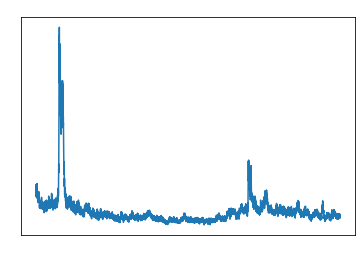

In [20]:
display(post_eip_blx)
post_eip_blx=post_eip_blx.sort_values(by=['number'])
display(post_eip_blx)


my_number=list(range(len(post_eip_blx.number)))
real_blx=post_eip_blx.number
my_base_fee=list(post_eip_blx.base_fee_per_gas)


fig = plt.figure()
ax = plt.axes()

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y',colors='white')
ax.title.set_color('white')
plt.plot(my_number[:10000],my_base_fee[:10000])

print(real_blx[0],real_blx[650],real_blx[1000],real_blx[6500],real_blx[8000], \
      real_blx[10000])

print(real_blx[750]>real_blx[1000])

#real_blx[]


#6500-8000
#650-1000
post_eip_blx.iloc[10000]
#real_blx[800]>real_blx[1000]

The results seem to indicate that the most severe spikes in the first 10000 observations are from 12966350-12966100, and 12972100-12973300. When extracting data from the block, I'm gonna want 12965400 through 12975500

Graphs on request of Kieth

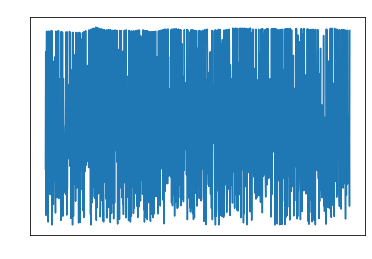

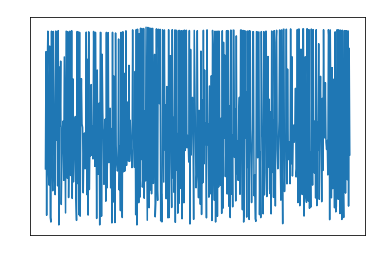

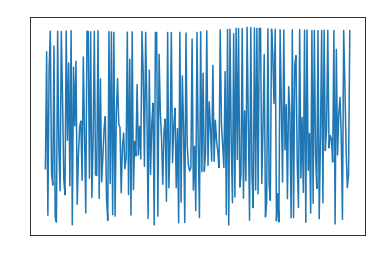

In [4]:
my_number=list(range(len(post_eip_blx.number)))
real_blx=post_eip_blx.number
my_gas_used=list(post_eip_blx.gas_used)




fig = plt.figure()
ax = plt.axes()

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y',colors='white')
ax.title.set_color('white')
plt.plot(my_number[0:1000],my_gas_used[0:1000])


fig2 = plt.figure()
ax2 = plt.axes()

ax2.xaxis.label.set_color('white')
ax2.yaxis.label.set_color('white')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y',colors='white')
ax2.title.set_color('white')
plt.plot(my_number[0:500],my_gas_used[0:500])


fig3 = plt.figure()
ax3 = plt.axes()

ax3.xaxis.label.set_color('white')
ax3.yaxis.label.set_color('white')
ax3.tick_params(axis='x', colors='white')
ax3.tick_params(axis='y',colors='white')
ax3.title.set_color('white')
plt.plot(my_number[0:250],my_gas_used[0:250])




#print(real_blx[0],real_blx[10000])